In [1]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd


In [8]:
tweets = pd.read_csv('/content/drive/MyDrive/assignment/Elon_musk.csv',encoding='latin-1',error_bad_lines=False)

<ipython-input-8-1300f90e29eb>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  tweets = pd.read_csv('/content/drive/MyDrive/assignment/Elon_musk.csv',encoding='latin-1',error_bad_lines=False)


In [9]:
tweets.head()

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...


In [10]:
# Dropping additional index column 'Unnamed'

tweets = tweets.drop('Unnamed: 0', axis = 1)
tweets.head()

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [11]:
# removing both the leading and the trailing characters such as spaces in tweets
tweets = [x.strip() for x in tweets.Text]

In [12]:
# removes empty strings, because they are considered in Python as False
tweets = [x for x in tweets if x]

In [13]:
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [14]:
import nltk

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(tweets))
sentences

['@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock 

In [17]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
922,"@kenyanwalstreet Not actually a payout, just a..."
923,"It may never pay out, as the stock cant b ht..."
924,Details Aug 28.
925,AI symbiosis while u wait @vistacruiser7 @flcn...


In [19]:
afinn= pd.read_csv('/content/drive/MyDrive/assignment/Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [20]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [21]:
affinity_scores = afinn.set_index(['word'])['value'].to_dict()

In [22]:
!python -m spacy download en_core_web_sm

2023-12-11 07:34:26.536908: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-11 07:34:26.536967: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-11 07:34:26.536997: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-11 07:34:26.542374: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-11 07:34:27.405408: W tensorflow/compiler/

In [24]:
#Custom function :score each word in a sentence in lemmatised form,
#but calculate the score for the whole original sentence.
import spacy
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [25]:
# test that it works
calculate_sentiment(text = 'good')

3

In [26]:
sent_df['sentiment_neg'] = sent_df['sentence'].apply(calculate_sentiment)

In [27]:
sent_df

,sentence,sentiment_neg
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0
1,Have you tried it?,0
2,@joerogan @Spotify Great interview!,3
3,@gtera27 Doge is underestimated @teslacn Congr...,3
4,Now on to the next for even more!!,0
...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0
923,"It may never pay out, as the stock cant b ht...",-4
924,Details Aug 28.,0
925,AI symbiosis while u wait @vistacruiser7 @flcn...,-2


In [28]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0      13
1       4
2       4
3      13
4       8
       ..
922    11
923    31
924     3
925    47
926    15
Name: word_count, Length: 927, dtype: int64

In [29]:
sent_df.sort_values(by='sentiment_neg')

,sentence,sentiment_neg,word_count
840,Cool Model 3 review by @iamjamiefoxx https://t...,-8,61
650,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
64,"Also, the road to hell is mostly paved with ba...",-7,11
923,"It may never pay out, as the stock cant b ht...",-4,31
683,"Occasional flights from land are ok, but frequ...",-4,39
...,...,...,...
648,Its https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
588,The open areas https://t.co/rabjKrtQlw @Sav...,14,138
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231


In [30]:
# Maximum sentiment value
sent_df['sentiment_neg'].max()

17

In [31]:
# tweet which is having max sentiment value
sent_df[sent_df['sentiment_neg']==16]

,sentence,sentiment_neg,word_count
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94


In [32]:
# Full tweet at index 105
sent_df['sentence'][105]

'@Erdayastronaut @SpaceX Was also thinking that SpaceX Boca should hold fun parties and give tours for the community from time to time @Erdayastronaut @SpaceX I super support public spaces around our production &amp; launch sites, wherever it can be done\x85 https://t.co/wmqWcT2WFH @Christo49699922 @sean18743005 @Erdayastronaut @SpaceX That too @sean18743005 @Erdayastronaut @SpaceX Catapult high into the air &amp; land on the roof with a base jumping parachute (the only way to travel) @Erdayastronaut @SpaceX That\x92s actually our restaurant, but SpaceX is building a futuristic bar at the top of the h\x85 https://t.co/z2UmtGSAoI @techreview And increase fun!'

In [33]:
# minimum sentiment value
sent_df['sentiment_neg'].min()

-8

In [34]:
# tweet which is having min sentiment value
sent_df[sent_df['sentiment_neg']==-8]

,sentence,sentiment_neg,word_count
650,Very ba https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
840,Cool Model 3 review by @iamjamiefoxx https://t...,-8,61


In [35]:
# Full tweet at index 647
sent_df['sentence'][647]


'https://t.co/AIwrMzB3D1 @VitalVegas Cool RT @neuralink: Snout Boops https://t.co/ZJogq2ulvf @Nigel_Lockyer @Penn @Fermilab Physics is the law, everything else is a recommendation @SamTalksTesla @Teslarati If some company has solved a useful thing that we can just buy, that would be great!'

In [36]:
# Sentiment score of the whole review
sent_df['sentiment_neg'].describe()

count    927.000000
mean       1.348436
std        2.688761
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_neg, dtype: float64

In [37]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_neg']<=0]

,sentence,sentiment_neg,word_count
0,@kunalb11 Im an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14
...,...,...,...
922,"@kenyanwalstreet Not actually a payout, just a...",0,11
923,"It may never pay out, as the stock cant b ht...",-4,31
924,Details Aug 28.,0,3
925,AI symbiosis while u wait @vistacruiser7 @flcn...,-2,47


In [38]:
sent_df[sent_df['sentiment_neg']>=10]

,sentence,sentiment_neg,word_count
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",16,231
81,@teslaownersSV This is a good one @MrBeastYT I...,13,38
105,@Erdayastronaut @SpaceX Was also thinking that...,16,94
153,"@GUNMTLM3 @lexfridman No, but definitely this ...",10,45
161,@harsimranbansal @heydave7 It will most likely...,11,93
185,Theres some great AI out ther https://t.co/v...,10,48
186,"Also, w https://t.co/IYdKttVsqk @cleantechnic...",12,98
226,"@PPathole @karpathy For a second there, I thou...",11,69
492,Gives a false sense of https://t.co/aIGaEnC8f...,10,41
532,@TeslaClubIN @WholeMarsBlog @MKBHD Next year f...,10,121


In [39]:
sent_df['index']=range(0,len(sent_df))

<ipython-input-40-ca34c1fc796f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['sentiment_neg'])


<Axes: xlabel='sentiment_neg', ylabel='Density'>

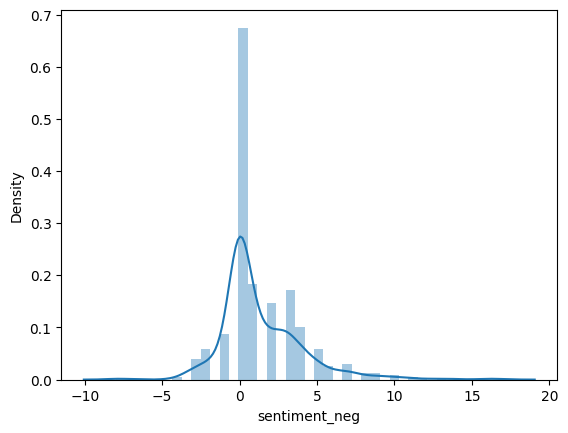

In [40]:
import seaborn as sns
sns.distplot(sent_df['sentiment_neg'])

<Axes: xlabel='index', ylabel='sentiment_neg'>

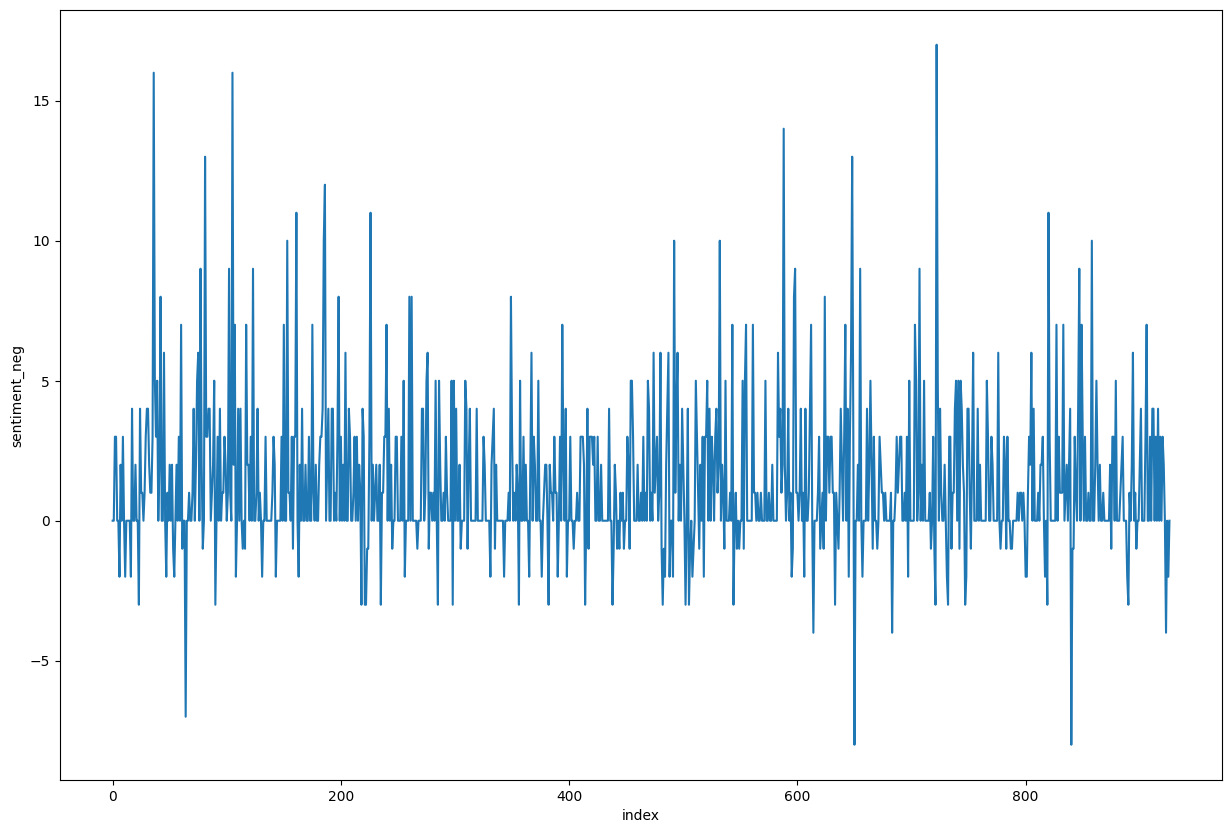

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_neg',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_neg'>

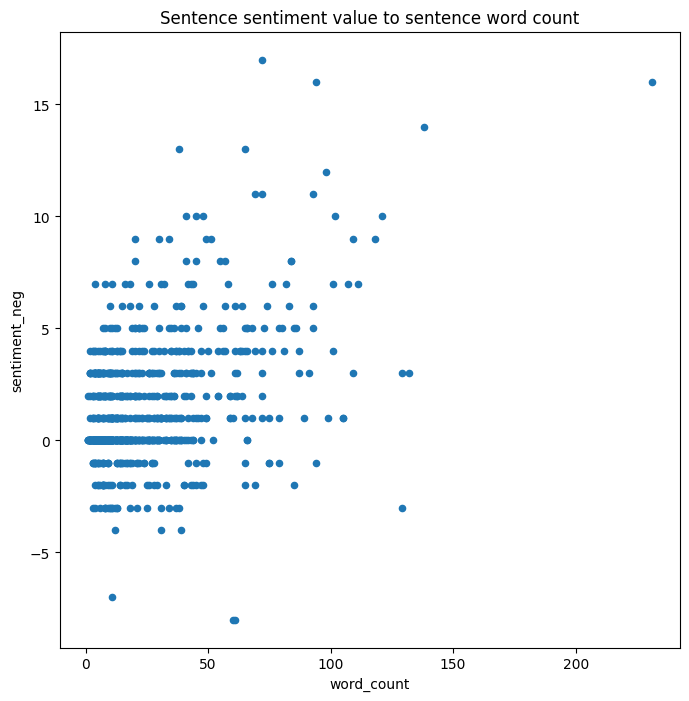

In [43]:
sent_df.plot.scatter(x='word_count', y='sentiment_neg', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [44]:
sent_df['Sentiment_Class'] = pd.cut(x=sent_df['sentiment_neg'],bins=[-8, -1, 0, 17],
                                    labels=['Negative','Neutral','Positive'], right = True)

In [45]:
sent_df.sample(10)

,sentence,sentiment_neg,word_count,index,Sentiment_Class
266,The point of companies is products &amp; servi...,0,8,266,Neutral
912,Mass Effect 2 (talking about sequels) is amazing.,4,8,912,Positive
37,Short-term: solve brain/spine injuries\nLong-t...,5,79,37,Positive
639,This is not fully appreciated.,2,5,639,Positive
597,Doubles as an underground nuclear shelter <U+0...,8,84,597,Positive
696,https://t.co/zTRMvQ6Wvx He might run for Presi...,3,43,696,Positive
878,Lots to talk about!,0,4,878,Neutral
209,<U+2600><U+FE0F> The journey continues!,0,4,209,Neutral
837,[Auto Focus Ep 5]\n\nhttps://t.co/3lC3l2Rgcj h...,0,18,837,Neutral
784,Parachutes were originally the backup landing ...,3,28,784,Positive


<Axes: xlabel='Sentiment_Class', ylabel='count'>

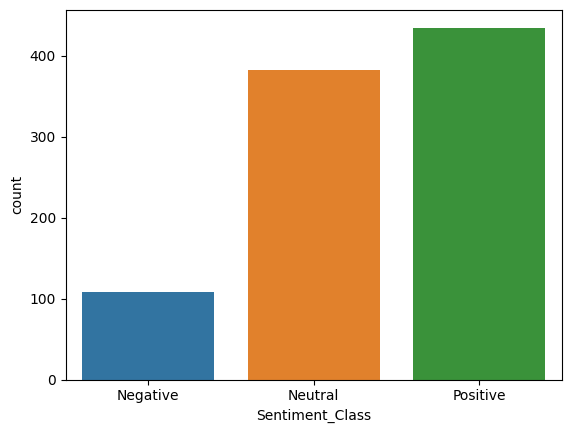

In [46]:
sns.countplot(x = 'Sentiment_Class', data = sent_df)

In [47]:
sent_df['Sentiment_Class'].value_counts()

Positive    435
Neutral     382
Negative    108
Name: Sentiment_Class, dtype: int64